In [ ]:
!git clone -b hc/gradcam https://github.com/eric0708/VisualFaceSimilaritySearch.git
%cd VisualFaceSimilaritySearch

!gdown "https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM" -O img_align_celeba.zip
!unzip img_align_celeba.zip -d data/raw/
!rm data/raw/img_align_celeba.zip


fatal: destination path 'VisualFaceSimilaritySearch' already exists and is not an empty directory.
/content/VisualFaceSimilaritySearch
Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=c2c81692-c6ff-4a64-9d51-d447d1825a37
To: /content/VisualFaceSimilaritySearch/img_align_celeba.zip
 25% 368M/1.44G [00:07<00:11, 93.8MB/s]Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/response.py", line 779, in _error_catcher
    yield
  File "/usr/local/lib/python3.12/dist-packages/urllib3/response.py", line 904, in _raw_read
    data = self._fp_read(amt, read1=read1) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/response.py", line 887, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  

rm: cannot remove 'data/raw/img_align_celeba.zip': No such file or directory


In [1]:
from config import Config
from embeddings.clip_embedder import CLIPEmbedder
from data.data_preprocessing import DataPreprocessor
import os


config = Config()
embedder = CLIPEmbedder()
    

save_path = os.path.join(config.EMBEDDINGS_DIR, 'clip_embeddings.h5')
loaded_embeddings, loaded_paths, metadata = CLIPEmbedder.load_embeddings(save_path)
preprocessor = DataPreprocessor()
    
# processed_dir = config.PROCESSED_DATA_DIR
# image_paths = preprocessor.collect_image_paths(processed_dir, max_images=100)
# embeddings, valid_paths = embedder.embed_dataset(
#     image_paths, batch_size=32, save_path=save_path
# )

🚀 Using MPS (Apple Silicon GPU)


/Users/chc/Desktop/VisualFaceSimilaritySearch/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading CLIP model: ViT-L/14
Device: mps
CLIP model loaded. Embedding dimension: 768
Loading embeddings from /Users/chc/Desktop/VisualFaceSimilaritySearch/embeddings/clip_embeddings.h5...
Loaded 100 embeddings
All directories created successfully!
Using 8 workers for data loading (CPU count: 8)


In [2]:
loaded_embeddings.shape

(100, 512)

In [1]:
!export PYTORCH_ENABLE_MPS_FALLBACK=1

In [1]:
import os 

from visualization.attention_viz import AttentionVisualizer
from embeddings.dinov2_embedder import DINOv2Embedder
from data.data_preprocessing import DataPreprocessor
from config import Config
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"


config = Config()

preprocessor = DataPreprocessor()
image_paths = preprocessor.collect_image_paths(
    config.RAW_DATA_DIR, max_images=30000000
)
# embedder = DINOv2Embedder()
# visualizer = AttentionVisualizer()

# save_dir = os.path.join(config.RESULTS_DIR, "attention_results")

# # Single image attention
# attn_data = embedder.extract_attention_maps(image_paths[0])
# map = visualizer.visualize_attention_map(
#     attn_data["attention_map"],
#     image_paths[0],
#     save_path=os.path.join(save_dir, "attention_demo.jpg"),
# )

🚀 Using MPS (Apple Silicon GPU)


/Users/chc/Desktop/VisualFaceSimilaritySearch/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All directories created successfully!
Using 8 workers for data loading (CPU count: 8)
Found 202599 images.


In [2]:
image_paths

['/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/052628.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/110369.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/161590.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/065084.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/108526.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/045354.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/139923.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/091663.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/107615.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/003301.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/195377.jpg',
 '/Users/chc/Desktop/VisualFaceSimilaritySearch/data/raw/sample_faces/150995.jpg',
 '/U

In [21]:
import faiss

index = faiss.IndexFlatL2(512)
index.add(loaded_embeddings)
D, I = index.search(loaded_embeddings[3:4], 10)

D

array([[0.        , 0.5476235 , 0.5913032 , 0.67675984, 0.68110144,
        0.6824132 , 0.68781126, 0.7055378 , 0.7177789 , 0.7264991 ]],
      dtype=float32)

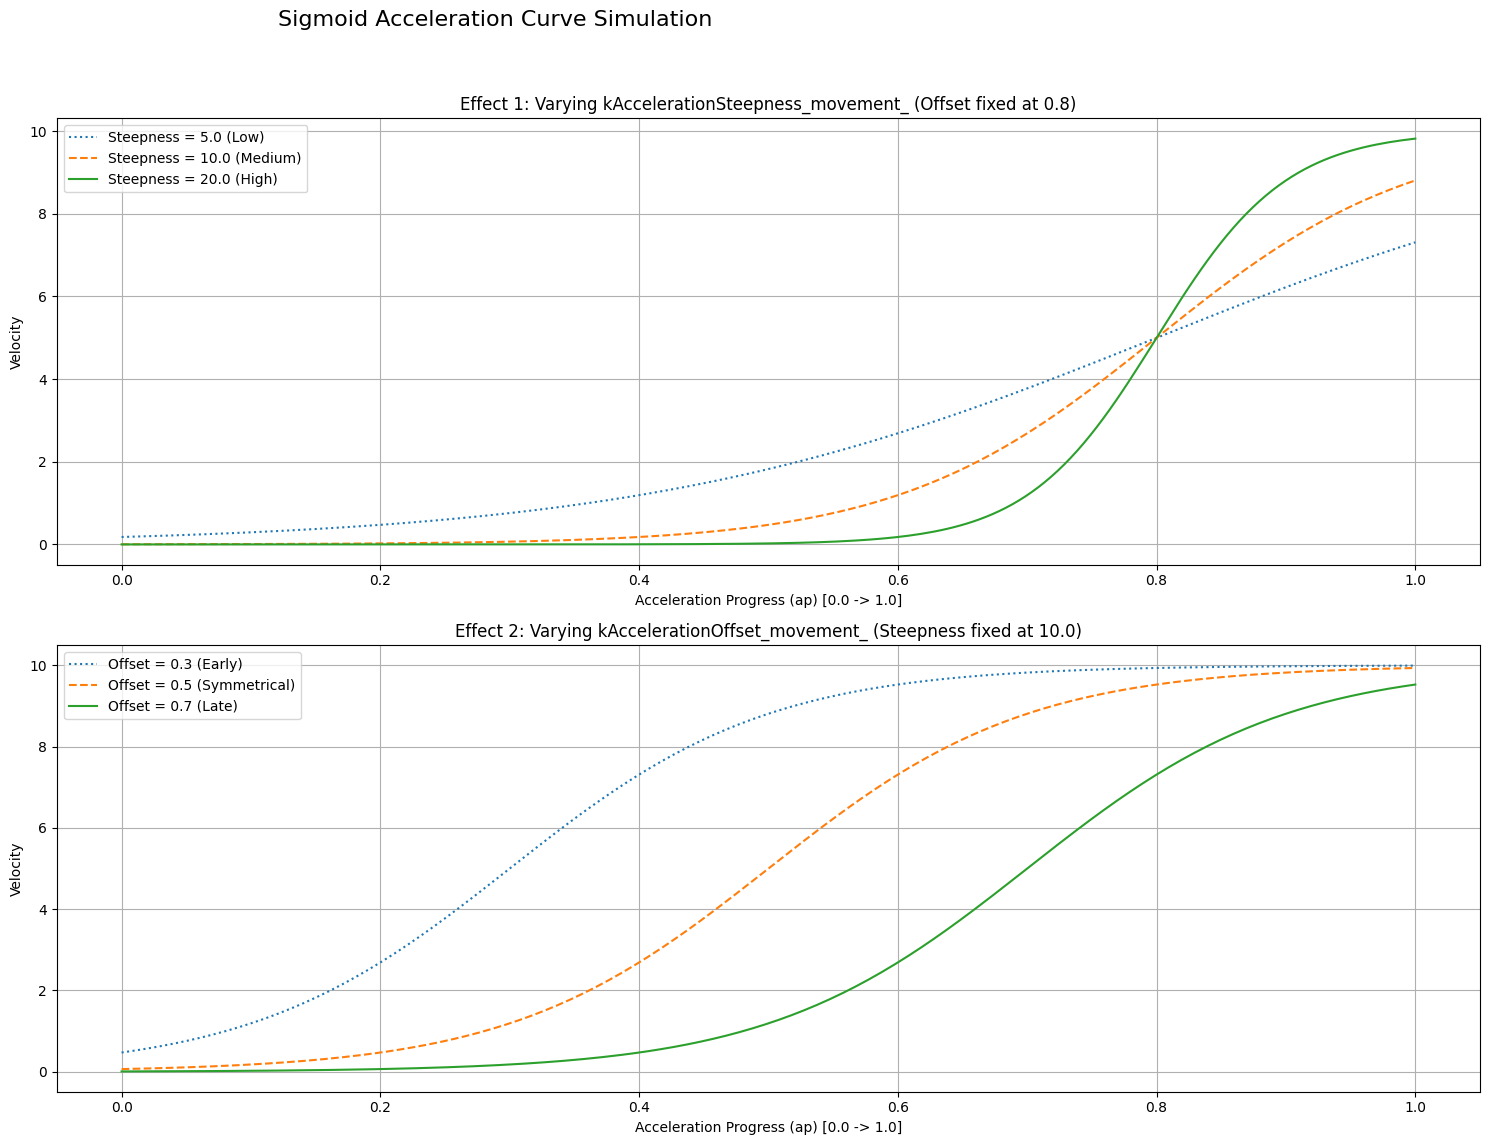

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def compute_acceleration_velocity(ap, cruise_v, steepness, offset):
    """
    Calculates the velocity on the acceleration curve.

    ap: Acceleration progress (0.0 to 1.0)
    cruise_v: The target cruise velocity (e.g., 10.0)
    steepness: The kAccelerationSteepness_movement_ parameter
    offset: The kAccelerationOffset_movement_ parameter
    """

    # This is the Python implementation of the C++ line:
    # velocity = cruise_v / (1.0 + std::exp(-steepness * (ap - offset)));
    z = -steepness * (ap - offset)
    return cruise_v / (1.0 + np.exp(z))


# --- Setup Simulation Parameters ---
CRUISE_V = 10.0  # Let's assume a cruise velocity of 10.0 m/s
# X-axis: Acceleration progress from 0.0 (start) to 1.0 (end)
ap = np.linspace(0.0, 1.0, 200)

# --- Experiment 1: Varying kAccelerationSteepness_movement_ ---
# We keep offset symmetrical (0.5) and change the steepness
steepness_low = 5.0
steepness_mid = 10.0
steepness_high = 20.0
offset_const = 0.8

vel_steep_low = compute_acceleration_velocity(ap, CRUISE_V, steepness_low, offset_const)
vel_steep_mid = compute_acceleration_velocity(ap, CRUISE_V, steepness_mid, offset_const)
vel_steep_high = compute_acceleration_velocity(
    ap, CRUISE_V, steepness_high, offset_const
)

# --- Experiment 2: Varying kAccelerationOffset_movement_ ---
# We keep steepness constant (10.0) and change the offset
steepness_const = 10.0
offset_early = 0.3  # Accelerate earlier
offset_mid = 0.5  # Symmetrical acceleration
offset_late = 0.7  # Accelerate later

vel_offset_early = compute_acceleration_velocity(
    ap, CRUISE_V, steepness_const, offset_early
)
vel_offset_mid = compute_acceleration_velocity(
    ap, CRUISE_V, steepness_const, offset_mid
)
vel_offset_late = compute_acceleration_velocity(
    ap, CRUISE_V, steepness_const, offset_late
)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle("Sigmoid Acceleration Curve Simulation", fontsize=16)

# Plot 1: The effect of Steepness
ax1.plot(ap, vel_steep_low, label=f"Steepness = {steepness_low} (Low)", linestyle=":")
ax1.plot(
    ap, vel_steep_mid, label=f"Steepness = {steepness_mid} (Medium)", linestyle="--"
)
ax1.plot(
    ap, vel_steep_high, label=f"Steepness = {steepness_high} (High)", linestyle="-"
)
ax1.set_title(
    f"Effect 1: Varying kAccelerationSteepness_movement_ (Offset fixed at {offset_const})"
)
ax1.set_xlabel("Acceleration Progress (ap) [0.0 -> 1.0]")
ax1.set_ylabel("Velocity")
ax1.legend()
ax1.grid(True)

# Plot 2: The effect of Offset
ax2.plot(ap, vel_offset_early, label=f"Offset = {offset_early} (Early)", linestyle=":")
ax2.plot(
    ap, vel_offset_mid, label=f"Offset = {offset_mid} (Symmetrical)", linestyle="--"
)
ax2.plot(ap, vel_offset_late, label=f"Offset = {offset_late} (Late)", linestyle="-")
ax2.set_title(
    f"Effect 2: Varying kAccelerationOffset_movement_ (Steepness fixed at {steepness_const})"
)
ax2.set_xlabel("Acceleration Progress (ap) [0.0 -> 1.0]")
ax2.set_ylabel("Velocity")
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0.03, 1.5, 0.95])
plt.show()


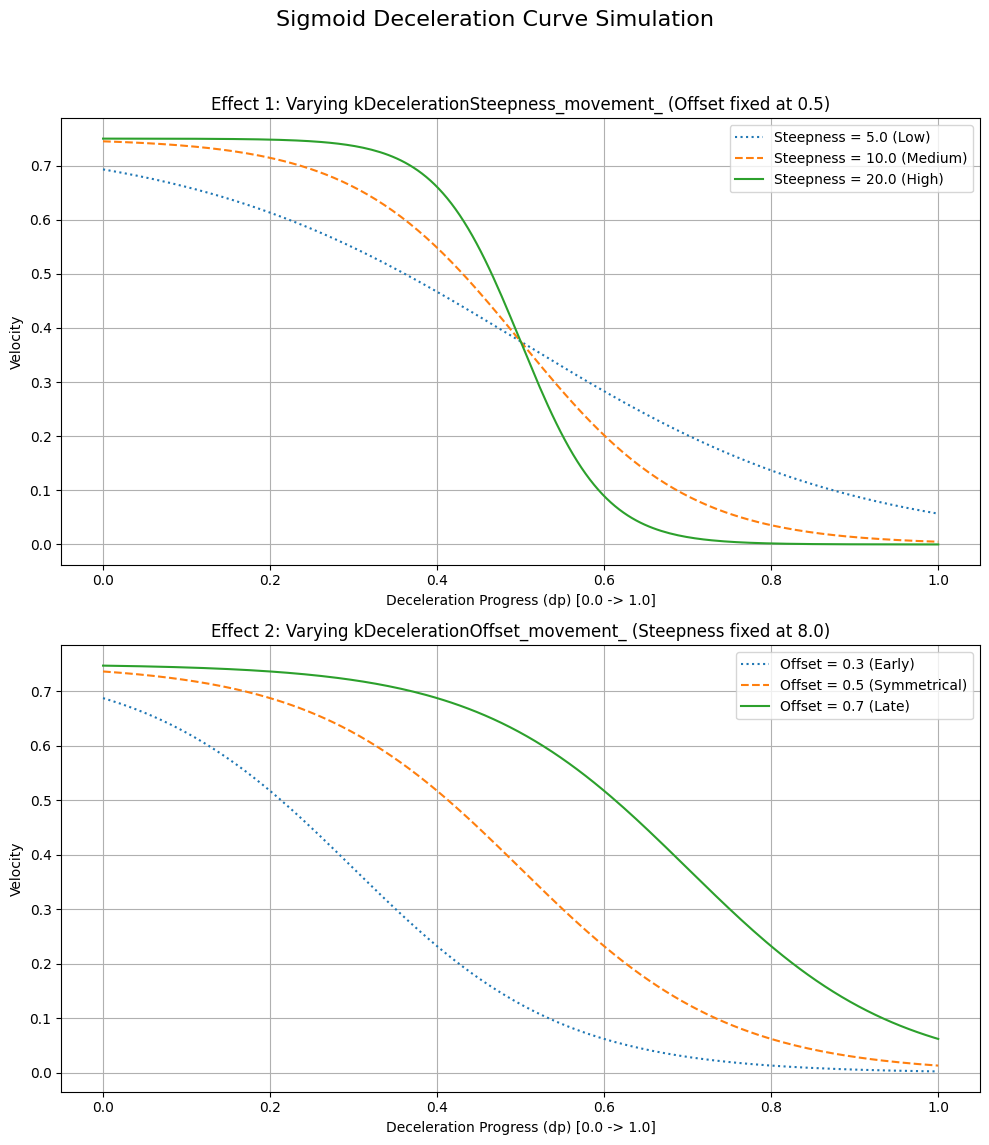

Final velocity: vel_offset_late[-1]=0.06237952237044176


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def compute_deceleration_velocity(dp, cruise_v, steepness, offset):
    """
    Calculates the velocity on the deceleration curve.

    dp: Deceleration progress (0.0 to 1.0)
    cruise_v: The cruise velocity (starting velocity, e.g., 10.0)
    steepness: The kDecelerationSteepness_movement_ parameter
    offset: The kDecelerationOffset_movement_ parameter
    """

    # This is the Python implementation of the C++ line:
    # velocity = cruise_v / (1.0 + std::exp(steepness * (dp - offset)));

    # NOTE: The argument of exp() is POSITIVE (steepness * ...),
    # which creates the falling (inverse S) curve.
    z = steepness * (dp - offset)
    return cruise_v / (1.0 + np.exp(z))


# --- Setup Simulation Parameters ---
CRUISE_V = 0.75  # Cruise velocity (this is the starting velocity for deceleration)
# X-axis: Deceleration progress from 0.0 (start) to 1.0 (end)
dp = np.linspace(0.0, 1.0, 200)

# --- Experiment 1: Varying kDecelerationSteepness_movement_ ---
# We keep offset symmetrical (0.5) and change the steepness
steepness_low = 5.0
steepness_mid = 10.0
steepness_high = 20.0
offset_const = 0.5

vel_steep_low = compute_deceleration_velocity(dp, CRUISE_V, steepness_low, offset_const)
vel_steep_mid = compute_deceleration_velocity(dp, CRUISE_V, steepness_mid, offset_const)
vel_steep_high = compute_deceleration_velocity(
    dp, CRUISE_V, steepness_high, offset_const
)

# --- Experiment 2: Varying kDecelerationOffset_movement_ ---
# We keep steepness constant (10.0) and change the offset
steepness_const = 8.0
offset_early = 0.3  # Decelerate earlier
offset_mid = 0.5  # Symmetrical deceleration
offset_late = 0.7  # Decelerate later

vel_offset_early = compute_deceleration_velocity(
    dp, CRUISE_V, steepness_const, offset_early
)
vel_offset_mid = compute_deceleration_velocity(
    dp, CRUISE_V, steepness_const, offset_mid
)
vel_offset_late = compute_deceleration_velocity(
    dp, CRUISE_V, steepness_const, offset_late
)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle("Sigmoid Deceleration Curve Simulation", fontsize=16)

# Plot 1: The effect of Steepness
ax1.plot(dp, vel_steep_low, label=f"Steepness = {steepness_low} (Low)", linestyle=":")
ax1.plot(
    dp, vel_steep_mid, label=f"Steepness = {steepness_mid} (Medium)", linestyle="--"
)
ax1.plot(
    dp, vel_steep_high, label=f"Steepness = {steepness_high} (High)", linestyle="-"
)
ax1.set_title(
    f"Effect 1: Varying kDecelerationSteepness_movement_ (Offset fixed at {offset_const})"
)
ax1.set_xlabel("Deceleration Progress (dp) [0.0 -> 1.0]")
ax1.set_ylabel("Velocity")
ax1.legend()
ax1.grid(True)

# Plot 2: The effect of Offset
ax2.plot(dp, vel_offset_early, label=f"Offset = {offset_early} (Early)", linestyle=":")
ax2.plot(
    dp, vel_offset_mid, label=f"Offset = {offset_mid} (Symmetrical)", linestyle="--"
)
ax2.plot(dp, vel_offset_late, label=f"Offset = {offset_late} (Late)", linestyle="-")
ax2.set_title(
    f"Effect 2: Varying kDecelerationOffset_movement_ (Steepness fixed at {steepness_const})"
)
ax2.set_xlabel("Deceleration Progress (dp) [0.0 -> 1.0]")
ax2.set_ylabel("Velocity")
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print(f"Final velocity: {vel_offset_late[-1]=}")


In [ ]:
import numpy as np
import math
import copy
import time as p_time  # Use 'p_time' to avoid conflict with simulation time


# (將上面第 1 部分的 compute_rail_movement_velocity 函數貼在這裡)
def compute_rail_movement_velocity(
    total_distance: float,
    move_dist: float,
    max_velocity: float,
    acceleration_start_ratio: float,
    deceleration_start_ratio: float,
    # --- Parameters that were class members in C++ ---
    max_linear_velocity: float,
    kAccelerationSteepness: float,
    kAccelerationOffset: float,
    kDecelerationSteepness: float,
    kDecelerationOffset: float,
    direction_sign: float = 1.0,
) -> float:
    """
    Python translation of the C++ ComputeRailMovementVelocity function.
    Calculates the target velocity at a specific traveled distance.
    """
    progress = 1.0
    epsilon = 1e-6
    if abs(total_distance) > epsilon:
        progress = np.clip(move_dist / abs(total_distance), 0.0, 1.0)
    cruise_v = np.clip(max_velocity, 0.0, max_linear_velocity)
    velocity = 0.0
    if progress <= acceleration_start_ratio:
        ap = np.clip(progress / max(epsilon, acceleration_start_ratio), 0.0, 1.0)
        z = -kAccelerationSteepness * (ap - kAccelerationOffset)
        velocity = cruise_v / (1.0 + np.exp(z))
    elif progress <= deceleration_start_ratio:
        velocity = cruise_v
    else:
        dp = np.clip(
            (progress - deceleration_start_ratio)
            / max(epsilon, (1.0 - deceleration_start_ratio)),
            0.0,
            1.0,
        )
        z = kDecelerationSteepness * (dp - kDecelerationOffset)
        velocity = cruise_v / (1.0 + np.exp(z))
    velocity *= direction_sign
    return np.clip(velocity, -max_linear_velocity, max_linear_velocity)


def simulate_travel_time(params: dict, dt: float = 0.001) -> float:
    """
    Simulates the total time to travel the full distance
    using numerical integration.

    params: A dictionary containing all parameters for the velocity function.
    dt: The time step for the simulation (e.g., 0.001 seconds).
    """
    current_dist = 0.0
    current_time = 0.0

    total_distance = params["total_distance"]

    # Calculate a sensible timeout to prevent infinite loops
    # Estimate: (dist / (50% avg vel)) + 10 sec buffer
    max_safe_time = (total_distance / (0.5 * params["max_velocity"] + 1e-6)) + 10000.0
    max_iterations = int(max_safe_time / dt)

    for _ in range(max_iterations):
        if current_dist >= total_distance:
            return current_time  # Success!

        # Get velocity at the current *distance*
        v = compute_rail_movement_velocity(
            total_distance,
            current_dist,
            params["max_velocity"],
            params["acceleration_start_ratio"],
            params["deceleration_start_ratio"],
            params["max_linear_velocity"],
            params["kAccelerationSteepness"],
            params["kAccelerationOffset"],
            params["kDecelerationSteepness"],
            params["kDecelerationOffset"],
            direction_sign=1.0,
        )

        # If velocity drops to zero before the end, it's stuck
        if v < 1e-9 and current_dist < (total_distance - 1e-6):
            # Give it a moment to start up
            if current_time > 0.1:
                return float("inf")  # Stuck

        # Update distance and time
        current_dist += v * dt
        current_time += dt

    return float("inf")  # Timed out


def run_simulations():
    """
    Runs a series of simulations with different parameters.
    """

    # --- Base Parameters for All Simulations ---
    BASE_PARAMS = {
        "total_distance": 100.0,  # meters
        "max_velocity": 10.0,  # m/s (desired cruise)
        "max_linear_velocity": 10.0,  # m/s (system limit)
        "acceleration_start_ratio": 0.2,  # Use first 20m to accel
        "deceleration_start_ratio": 0.8,  # Use last 20m to decel
        "kAccelerationSteepness": 10.0,  # Medium
        "kAccelerationOffset": 0.5,  # Symmetrical
        "kDecelerationSteepness": 10.0,  # Medium
        "kDecelerationOffset": 0.5,  # Symmetrical
    }

    # --- Define Scenarios to Test ---
    scenarios = {
        "1. Base Case (Steep=10, Offset=0.5)": {},
        "2. Aggressive Accel (Steep=20)": {"kAccelerationSteepness": 20.0},
        "3. Slow Accel (Steep=5)": {"kAccelerationSteepness": 5.0},
        "4. Aggressive Decel (Steep=20)": {"kDecelerationSteepness": 20.0},
        "5. Slow Decel (Steep=5)": {"kDecelerationSteepness": 5.0},
        "6. Max Aggression (All Steep=20)": {
            "kAccelerationSteepness": 20.0,
            "kDecelerationSteepness": 20.0,
        },
        "7. Max Slowness (All Steep=5)": {
            "kAccelerationSteepness": 5.0,
            "kDecelerationSteepness": 5.0,
        },
        "8. Early Accel (Offset=0.3) 'Fast start'": {"kAccelerationOffset": 0.3},
        "9. Late Accel (Offset=0.7) 'Slow start'": {"kAccelerationOffset": 0.7},
    }

    # --- Run and Print Results ---
    print("Running simulations...\n")
    results = {}

    for name, modifications in scenarios.items():
        sim_params = copy.deepcopy(BASE_PARAMS)
        sim_params.update(modifications)

        start_t = p_time.perf_counter()
        total_time = simulate_travel_time(sim_params, dt=0.001)
        end_t = p_time.perf_counter()

        results[name] = total_time
        print(f"[{name}]")
        print(f"  > Total Time: {total_time:.4f} seconds")
        print(f"  (Simulation took {(end_t - start_t) * 1000:.2f} ms to run)\n")

    print("-" * 60)
    print("Simulation Complete.")


if __name__ == "__main__":
    run_simulations()


------------------------------------------------------------
Benchmark: Ideal Trapezoid Time = 14.0000 seconds
 (Note: Sigmoid S-curves will *always* be slower than this)
------------------------------------------------------------
Running simulations...

[1. Base Case (Steep=10, Offset=0.5)]
  > Total Time: 69.3630 seconds
  (Simulation took 656.60 ms to run)

[2. Aggressive Accel (Steep=20)]
  > Total Time: 2242.3310 seconds
  (Simulation took 19859.54 ms to run)

[3. Slow Accel (Steep=5)]
  > Total Time: 44.5210 seconds
  (Simulation took 361.51 ms to run)



KeyboardInterrupt: 

In [9]:
def test_various_distances(best_params: dict):
    """
    Tests the best parameters across various distances to see how travel time scales.
    
    Args:
        best_params: Dictionary containing the optimal parameters found from simulations
    """
    print("=" * 60)
    print("Testing Various Distances with Best Parameters")
    print("=" * 60)
    print("\nBest Parameters:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    print("\n" + "-" * 60)
    
    # Define test distances (in meters)
    test_distances = [0.15, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
    
    results = []
    
    for distance in test_distances:
        # Create params for this distance
        test_params = copy.deepcopy(best_params)
        test_params["total_distance"] = distance
        test_params["max_velocity"] = min(distance, 0.75)
        
        # Run simulation
        start_t = p_time.perf_counter()
        total_time = simulate_travel_time(test_params, dt=0.001)
        end_t = p_time.perf_counter()
        
        # Calculate average velocity
        avg_velocity = distance / total_time if total_time != float("inf") else 0.0
        
        results.append({
            "distance": distance,
            "time": total_time,
            "avg_velocity": avg_velocity,
            "sim_duration": (end_t - start_t) * 1000
        })
        
        print(f"\nDistance: {distance:6.1f} m")
        print(f"  Travel Time:    {total_time:8.4f} s")
        print(f"  Avg Velocity:   {avg_velocity:8.4f} m/s")
        print(f"  Sim Duration:   {(end_t - start_t) * 1000:8.2f} ms")
    
    print("\n" + "=" * 60)
    print("Distance Testing Complete")
    print("=" * 60)
    
    return results


# Example usage with the base parameters as "best" parameters
if __name__ == "__main__":
    # Define your best parameters (modify these based on your simulation results)
    BEST_PARAMS = {
        "max_linear_velocity": 0.75,
        "acceleration_start_ratio": 0.2,
        "deceleration_start_ratio": 0.35,
        "kAccelerationSteepness": 3.0,
        "kAccelerationOffset": 0.15,
        "kDecelerationSteepness": 8.0,
        "kDecelerationOffset": 0.7,
    }
    
    distance_results = test_various_distances(BEST_PARAMS)


Testing Various Distances with Best Parameters

Best Parameters:
  max_linear_velocity: 0.75
  acceleration_start_ratio: 0.2
  deceleration_start_ratio: 0.35
  kAccelerationSteepness: 3.0
  kAccelerationOffset: 0.15
  kDecelerationSteepness: 8.0
  kDecelerationOffset: 0.7

------------------------------------------------------------

Distance:    0.1 m
  Travel Time:      1.9940 s
  Avg Velocity:     0.0752 m/s
  Sim Duration:      17.87 ms

Distance:    0.2 m
  Travel Time:      1.9940 s
  Avg Velocity:     0.1254 m/s
  Sim Duration:      17.22 ms

Distance:    0.5 m
  Travel Time:      1.9940 s
  Avg Velocity:     0.2508 m/s
  Sim Duration:      20.51 ms

Distance:    0.8 m
  Travel Time:      1.9940 s
  Avg Velocity:     0.3761 m/s
  Sim Duration:      22.78 ms

Distance:    1.0 m
  Travel Time:      2.6590 s
  Avg Velocity:     0.3761 m/s
  Sim Duration:      44.70 ms

Distance:    1.5 m
  Travel Time:      3.9890 s
  Avg Velocity:     0.3760 m/s
  Sim Duration:      35.24 ms

Dist